In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import utils

### Load Data

In [2]:
x_points= np.linspace(0,20)
y_points= -2*x_points + 1

In [3]:
multipleLR = np.loadtxt('Datasets/MultipleLR.csv',delimiter = ',')
x_points1 = multipleLR[:,0] 
x_points2 = multipleLR[:,1] 
x_points3 = multipleLR[:,2] 
y_points0 = multipleLR[:,3]


In [4]:
X1 = multipleLR[:,:3]
X2 = multipleLR[:,:2]

### Data Plotting Methods

In [5]:
def drawScatter(x,y,xlabel,ylabel,title):
    plt.scatter(x,y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

In [6]:
def drawScatter2(x,y,xlabel,ylabel,title):
    plt.plot(x,y,'-o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

In [7]:
def drawRegressionLine(x,y,xlabel,ylabel,title,theta0,theta1):
    drawScatter(x,y,xlabel,ylabel,title)
    plt.plot(x, theta0 + theta1*x_points ,color='red')

### Data Plotting

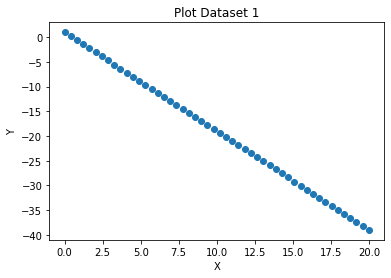

In [8]:
drawScatter(x_points,y_points,"X","Y","Plot Dataset 1")

## Stochastic Gradient

In [9]:
def stochasticGradient(x,y,epochs,alpha,threshold):
    theta0, theta1 = 0,0
    thetas0 , thetas1, costs,hs = [],[],[],[]
    grad0, grad1 = 0,0
    l=0 #???
    x, y = utils.shuffle(x, y)
    while(l<(epochs*len(x))) :
        for i in range (len(y)):
            h = theta0 + theta1 * x[i]
            e = h-y[i]
            cost = (e**2)/2
            hs.append(h)
            costs.append(cost)
            thetas0.append(theta0)
            thetas1.append(theta1)
            l+=1
            grad0 = e
            grad1 = e*x[i]
            theta0 = theta0 - alpha* grad0
            theta1 = theta1 - alpha*grad1
            

        if(abs(costs[l-len(x)]-costs[l-1])<threshold):
            break
       
        
    return thetas0, thetas1, costs , l

In [10]:
t0,t1,costs, iterations = stochasticGradient(x_points,y_points,5,0.001,0.02)
h = t1[-1]*x_points + t0[-1]

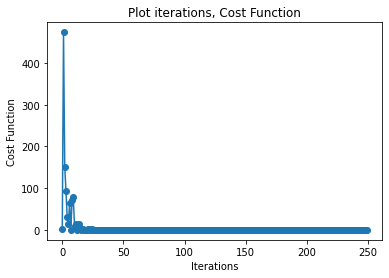

In [11]:
drawScatter2(np.arange(len(costs)),costs,"Iterations","Cost Function","Plot iterations, Cost Function")

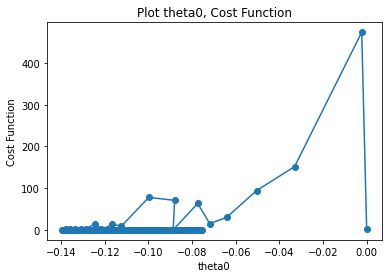

In [12]:
drawScatter2(t0,costs,"theta0","Cost Function","Plot theta0, Cost Function")

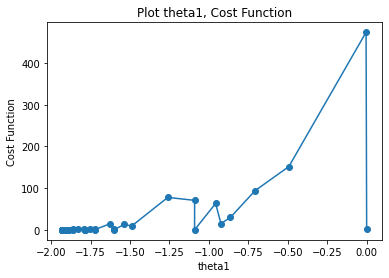

In [13]:
drawScatter2(t1,costs,"theta1","Cost Function","Plot theta1, Cost Function")

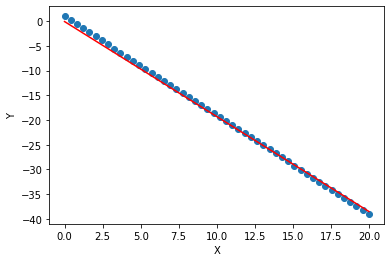

In [14]:
drawRegressionLine(x_points,y_points,"X","Y","",t0[-1],t1[-1])

In [15]:
print("r2 =",r2_score(y_points, h))
print("cost =",costs[-1])

r2 = 0.9978509598191085
cost = 0.009491716476066244


## MiniBatch Gradient

In [16]:
def miniBatch (x,y,batchSize,epochs,alpha,threshold):
    theta0, theta1 = 0,0
    thetas0 , thetas1, costs,hs = [],[],[],[]
    grad0, grad1 = 0,0
    x, y = utils.shuffle(x, y)
    for i in range(epochs):
        for j in range(0,len(x),batchSize):
            end = j+batchSize
            if(end > len(x)):
                end = len(x)
            h = theta0 + theta1 * x[j:end]
            e = h-y[j:end]
            cost =  np.sum(e**2)/(2*(end-j))
            hs.append(h)
            costs.append(cost)
            #print(j)
            thetas0.append(theta0)
            thetas1.append(theta1)
            grad0 = np.sum(e)/(end-j)
            grad1 = (np.sum(e*x[j:end]))/(end-j)
            theta0 = theta0 - alpha* grad0
            theta1 = theta1 - alpha*grad1
        if(i> 0 and abs(costs[i*(len(x)//(batchSize-1))-1]-costs[-1])<threshold):
            break
    return thetas0,thetas1,costs

In [17]:
t0,t1,costs = miniBatch(x_points,y_points,7,100,0.001,0.001)
h = t1[-1]*x_points + t0[-1]
print(costs[-1])

0.3064296335477545


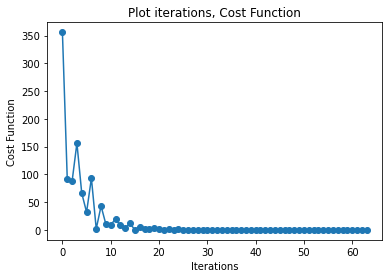

In [18]:
drawScatter2(np.arange(len(costs)),costs,"Iterations","Cost Function","Plot iterations, Cost Function")

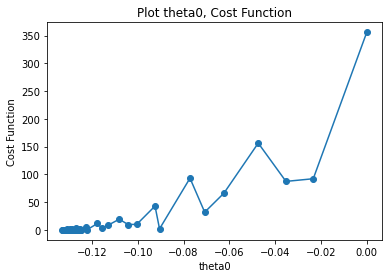

In [19]:
drawScatter2(t0,costs,"theta0","Cost Function","Plot theta0, Cost Function")

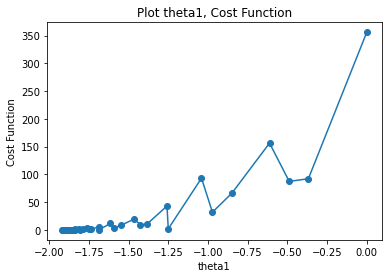

In [20]:
drawScatter2(t1,costs,"theta1","Cost Function","Plot theta1, Cost Function")

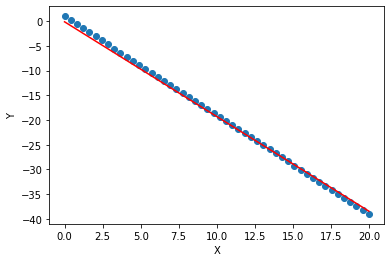

In [21]:
drawRegressionLine(x_points,y_points,"X","Y","",t0[-1],t1[-1])

In [22]:
print("r2 =",r2_score(y_points, h))
print("cost =",costs[-1])

r2 = 0.9976518671702946
cost = 0.3064296335477545


## Multivariate LR

In [23]:
def multiLR(x1,x2,x3,y,epochs,alpha):
    thetas=np.array([0,0,0,0])
    thetaList , costs,hs  = np.empty((1,4)),[],[]
    grads = []
    X = np.hstack((np.ones((len(x1), 1)), x1.reshape(len(x1), 1),x2.reshape(len(x2), 1),x3.reshape(len(x3), 1)))
    for i in range (epochs) :
        h = np.dot(thetas,X.T)
        e = h-y
        cost =  np.sum(np.dot(e,e)) /(len(y)*2)
        costs.append(cost)
        thetaList = np.append(thetaList,[thetas],axis =0)
        hs.append(h)
        grads = np.dot(X.T,e)/len(y)
        thetas = thetas - alpha * grads
    thetaList = np.delete(thetaList,0,0)
    return thetaList,costs,hs
    

In [24]:
thetas , costs ,h = multiLR(x_points1,x_points2,x_points3,y_points0,150,0.0001)  

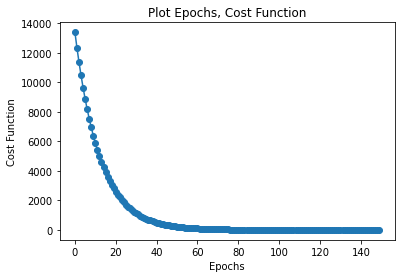

In [25]:
drawScatter2(np.arange(len(costs)),costs,"Epochs","Cost Function","Plot Epochs, Cost Function")

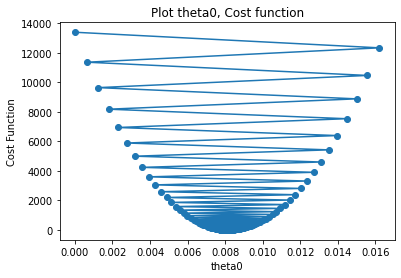

In [26]:
drawScatter2(thetas[:,0],costs,"theta0","Cost Function","Plot theta0, Cost function")

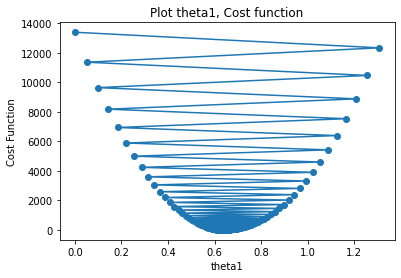

In [27]:
drawScatter2(thetas[:,1],costs,"theta1","Cost Function","Plot theta1, Cost function")

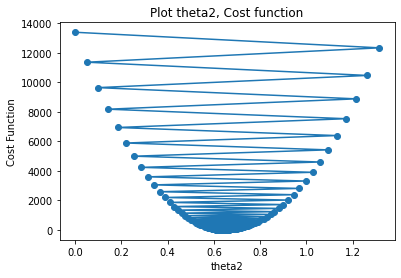

In [28]:
drawScatter2(thetas[:,2],costs,"theta2","Cost Function","Plot theta2, Cost function")

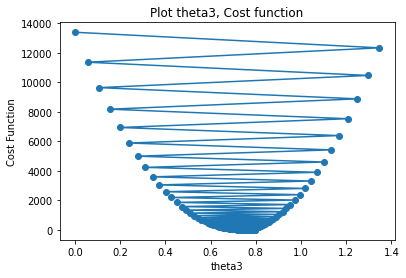

In [29]:
drawScatter2(thetas[:,3],costs,"theta3","Cost Function","Plot theta3, Cost function")

In [30]:
print("r2 =",r2_score(y_points0, h[-1]))
print("cost =",costs[-1])

r2 = 0.9830207542314073
cost = 4.711727117387845


In [31]:
def multiLRgeneral(X,y,epochs,alpha):
    thetas=np.array(np.zeros(X.shape[1]+1))
    thetaList , costs,hs  = np.empty((1,X.shape[1]+1)),[],[]
    grads = []
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    for i in range (epochs) :
        h = np.dot(thetas,X.T)
        e = h-y
        cost = np.sum(np.dot(e,e)) /(len(y)*2)
        costs.append(cost)
        thetaList = np.append(thetaList,[thetas],axis =0)
        hs.append(h)
        grads = np.dot(X.T,e)/len(y)
        thetas = thetas - alpha * grads
    thetaList = np.delete(thetaList,0,0)
    return thetaList,costs,hs
    

In [32]:
thetas , costs ,h = multiLRgeneral(X1,y_points0,150,0.0001)  

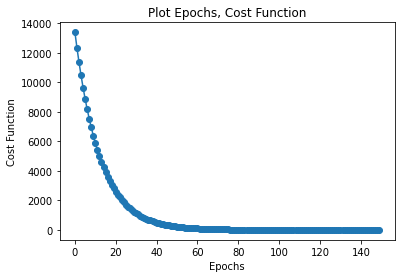

In [33]:
drawScatter2(np.arange(len(costs)),costs,"Epochs","Cost Function","Plot Epochs, Cost Function")

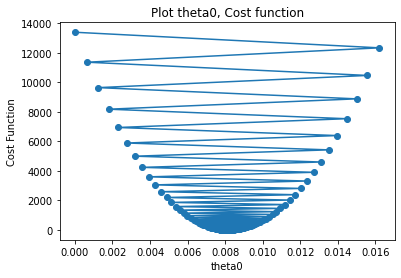

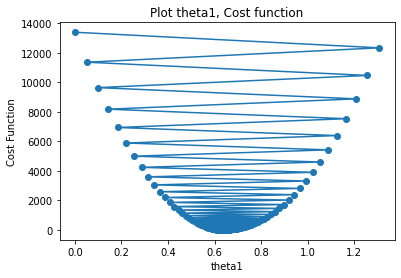

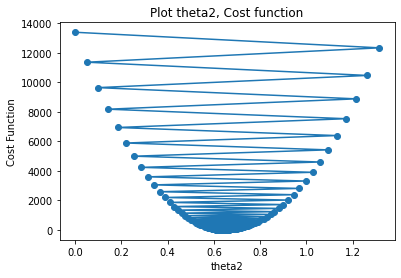

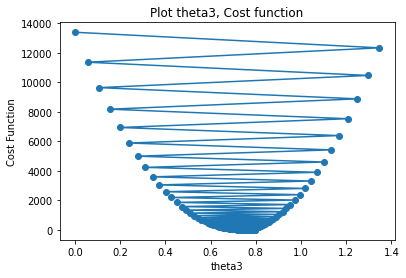

In [34]:
for i in range(X1.shape[1]+1):
    title = "Plot theta"+str(i)+", Cost function"
    drawScatter2(thetas[:,i],costs,"theta"+str(i),"Cost Function",title)
    plt.show()

In [35]:
print("r2 =",r2_score(y_points0, h[-1]))
print("cost =",costs[-1])

r2 = 0.9830207542314073
cost = 4.711727117387845


In [36]:
thetas , costs ,h = multiLRgeneral(X2,y_points0,150,0.00001)  

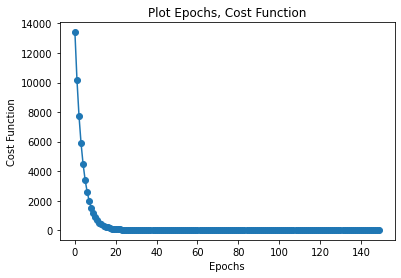

In [37]:
drawScatter2(np.arange(len(costs)),costs,"Epochs","Cost Function","Plot Epochs, Cost Function")

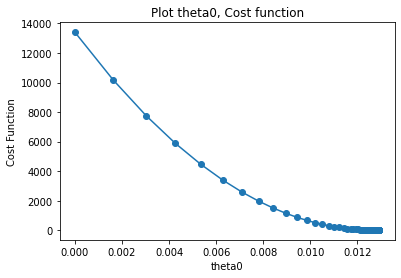

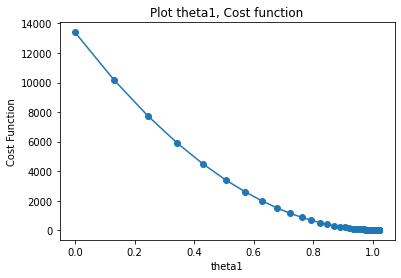

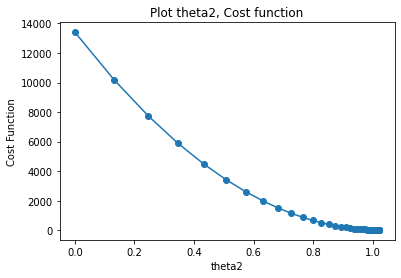

In [38]:
for i in range(X2.shape[1]+1):
    title = "Plot theta"+str(i)+", Cost function"
    drawScatter2(thetas[:,i],costs,"theta"+str(i),"Cost Function",title)
    plt.show()

In [39]:
print("r2 =",r2_score(y_points0, h[-1]))
print("cost =",costs[-1])

r2 = 0.9207011295706972
cost = 22.005373105035204
